# Home Assignment 1: Deep Learning from Scratch

**Authors:** Yoav Elem and Amir Solimani

## Introduction

In this assignment, we will be implementing deep learning algorithms from scratch. Before we begin, let's set up our environment by downloading the necessary packages and performing the required imports.

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from layers import ReLULayer, TanhLayer, ResidualTanhLayer
from losses import LinearLayer, SoftmaxLayer
from neural_network import GenericNetwork, ResidualNeuralNetwork
from utils import plot_loss_and_accuracy, plot_data, SGD
from tests import *

import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Set numpy print options
np.set_printoptions(precision=10, suppress=True)

# Load the datasets
swiss_roll =scipy.io.loadmat('HW1_Data/SwissRollData.mat')
peaks =scipy.io.loadmat('HW1_Data/PeaksData.mat')
gmm = scipy.io.loadmat('HW1_Data/GMMData.mat')
sample_data = scipy.io.loadmat('HW1_Data/SampleData.mat')

## 2.1.1 Softmax Layer and Gradient Test

In this section, we were asked to implement a weighted softmax loss layer, that can compute the result of softmax on a given input, and the gradient of cross entropy loss with respect to the parameters.
To complete this task, we created the class [SoftmaxLayer](losses.py#L4).
-  For the computing of the activation and the loss, we created the functions [forward](losses.py#L13) and [loss](losses.py#L70)
- For computing the gradient with respect to the weights we created the function [grad_w](losses.py#43)
- For computing the gradient with respect to the weights we created the function [grad_x](losses.py#L29)
- For computing the gradient test, we created the function [GradientTest](utils.py#L174) that plotted the graph below.

### An explanation on the graph:

In the test, we generate a random vector $ \mathbf{d} $ where $ \|\mathbf{d}\| = 1 $. We plot the following:

- **First Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x})\| $

- **Second Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x}) - \epsilon \mathbf{d}^\top \nabla \text{softmax}(\mathbf{x})\| $

The decay of epsilon is defined by the formula: $ \epsilon_t = 0.5^t $. 

In our plots, the x-axis represents the value of $ t $, and the y-axis shows the error measured in both first and second order errors.

Note1: the errors are presented in log-scale

Note2: as permitted in class, we did not implement biases for this layer (since we did not discuss it in class)

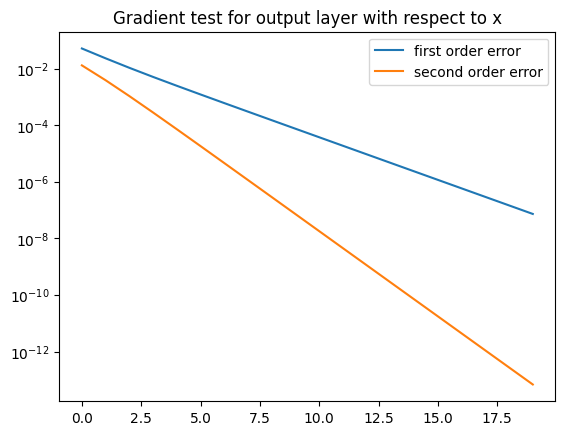

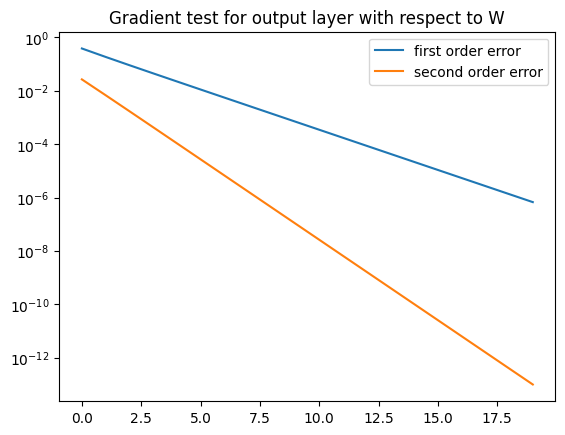

In [3]:
output_layer = SoftmaxLayer(2, 4)

# Tests the gradient of the softmax layer as presented in the notes
output_layer_grad_x_test(output_layer)
output_layer_grad_W_test(output_layer)

# 2.1.2 Minimizing an SGD Objective Function

## Overview
In this task, we are asked to implement the SGD optimizer.

## Task Description
For running the optimizer, we created the function [SGD](utils.py#L26).

For us to make sure the implementation works, we will test it on a sample problem, we will create a linear model, using MSE as a loss function,
and use the SGD implementation to solve it, more formally, we aim to solve the problem:

$$
Wx + b = x
$$

To generate the problem, we created the [LinearLayer](losses.py#L195) class. it implements the logic of the forward, loss, grad_x, grad_w and grad_b methods where

- [forward](losses.py#L205) computes $Wx + b$
- [loss](losses.py#L218) computes the MSE loss on a given input x and label y
- [grad_x](losses.py#L195) computes the gradient of the loss function with respect to the input
- [grad_w](losses.py#L247) computes the gradient of the loss function with respect to the weights
- [grad_b](losses.py#L277) computes the gradient of the loss function with respect to the biases

Note: The implementation of SGD is aimed to be as generic as possible, for us to use through the entire project.
so we created it to work on a Neural Network rather than a single layer, for this reason we "wrap" our linear layer with a [GenericNeuralNetwork](neural_netowrk.py#L10).
this design choise does not change the computations at all.

Note: the prints accuracy 0 are to be ignored (they are not relevant for non classification problems)

Epoch 0, training loss: 2.0635172213064985
Epoch 0, training accuracy: 0.0
Epoch 0, validation loss: 2.0635172213064985
Epoch 0, validation accuracy: 0.0
Epoch 1, training loss: 2.001567484237971
Epoch 1, training accuracy: 0.0
Epoch 1, validation loss: 2.001567484237971
Epoch 1, validation accuracy: 0.0
Epoch 2, training loss: 1.9414775668420068
Epoch 2, training accuracy: 0.0
Epoch 2, validation loss: 1.9414775668420068
Epoch 2, validation accuracy: 0.0
Epoch 3, training loss: 1.8831916346731656
Epoch 3, training accuracy: 0.0
Epoch 3, validation loss: 1.8831916346731656
Epoch 3, validation accuracy: 0.0
Epoch 4, training loss: 1.8266555295158797
Epoch 4, training accuracy: 0.0
Epoch 4, validation loss: 1.8266555295158797
Epoch 4, validation accuracy: 0.0
Epoch 5, training loss: 1.7718167190616427
Epoch 5, training accuracy: 0.0
Epoch 5, validation loss: 1.7718167190616427
Epoch 5, validation accuracy: 0.0
Epoch 6, training loss: 1.71862424809695
Epoch 6, training accuracy: 0.0
Epoch

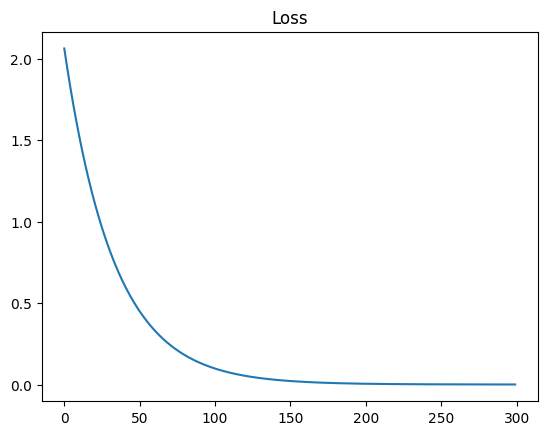

In [4]:
# define learning rate
lr = 5e-3

# generate a random input vector
x = np.random.rand(3, 1)

# define the target vector
y = x

# define the linear layer
linear_layer = GenericNetwork(LinearLayer(3, 3)) 

# Run the SGD algorithm
loss, _, _, _ = SGD(x, y, x, y, linear_layer, lr, epochs=300)

# plot the loss
plt.plot(loss)
plt.title('Loss')
plt.show()

### 2.1.3 Task Description

In this task, we are required to demonstrate the minimization of the softmax layer we created on a dataset using the SGD variant we developed. To do this, we created a sample dataset with the following characteristics:

- The datapoints are $(a, b)$ points on the plane, divided into 4 classes:
  - Class 0: if $a \ge 0$ and $b \ge 0$.
  - Class 1: if $a < 0$ and $b > 0$.
  - Class 2: if $a < 0$ and $b < 0$.
  - Class 3: if $a > 0$ and $b < 0$.

Since the softmax layer is a linear classifier, we had to ensure the dataset is linearly separable. To learn the dataset, we implemented the softmax layer. Note that we created a neural network with a single layer, which is the softmax layer, as our SGD implementation is designed to work on a network rather than an individual layer. In practice, there is no difference in computation.
We ran the experiment with 5 epochs on the dataset, each time experimenting with different mini-batch sizes and different learning rates.

| Learning Rate / Mini Batch Size | Size 16 | Size 64 | Size 256 |
|---------------------------------|--------|--------|---------|
| 5e-5                            |     0.75   |    0.59    |     0.61    |
| 5e-3                            |    0.998    |     0.997   |     0.991    |
| 5e-1                            |      0.989  |    0.991    |       0.996  |

The table shows the different **accuracies** measured at the end of the experiment on the validation set. As observed, the batch size did not have a significant impact. The learning rate of 5e-5 performed poorly, but this is attributed to the limited training duration of only 5 epochs, requiring more time to converge due to its small magnitude. The best result was obtained with a learning rate of 5e-3 and a mini-batch size of 16.


Epoch 0, training loss: 0.23174704840595886
Epoch 0, training accuracy: 0.99595
Epoch 0, validation loss: 0.232355839088857
Epoch 0, validation accuracy: 0.9948
Epoch 1, training loss: 0.18339290044487078
Epoch 1, training accuracy: 0.9979
Epoch 1, validation loss: 0.18384908261179153
Epoch 1, validation accuracy: 0.9982
Epoch 2, training loss: 0.15987301299735987
Epoch 2, training accuracy: 0.9983
Epoch 2, validation loss: 0.16029102937030174
Epoch 2, validation accuracy: 0.999
Epoch 3, training loss: 0.14508222034753723
Epoch 3, training accuracy: 0.99845
Epoch 3, validation loss: 0.14547103064989914
Epoch 3, validation accuracy: 0.9994
Epoch 4, training loss: 0.13457732025353766
Epoch 4, training accuracy: 0.99795
Epoch 4, validation loss: 0.13504652612888482
Epoch 4, validation accuracy: 0.9986


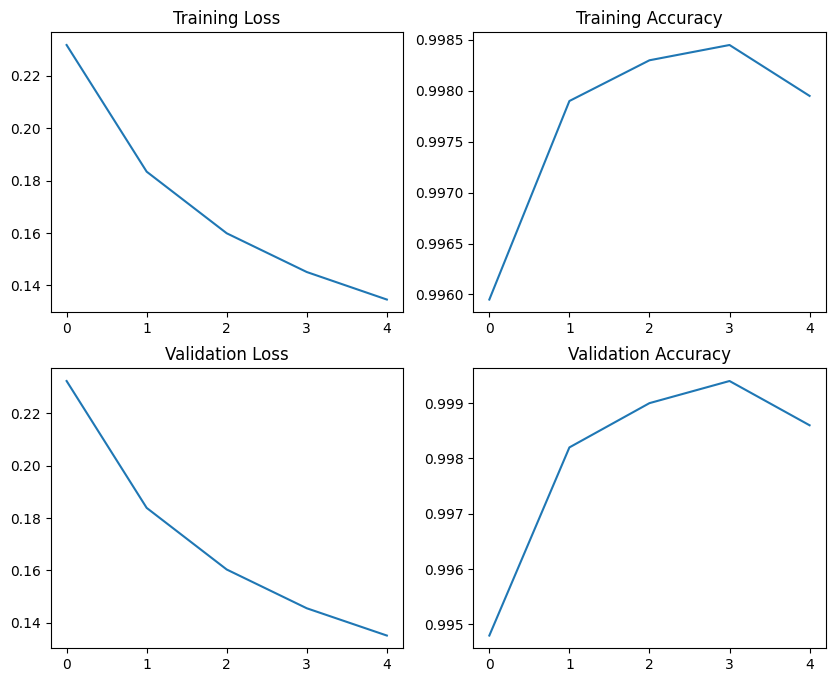

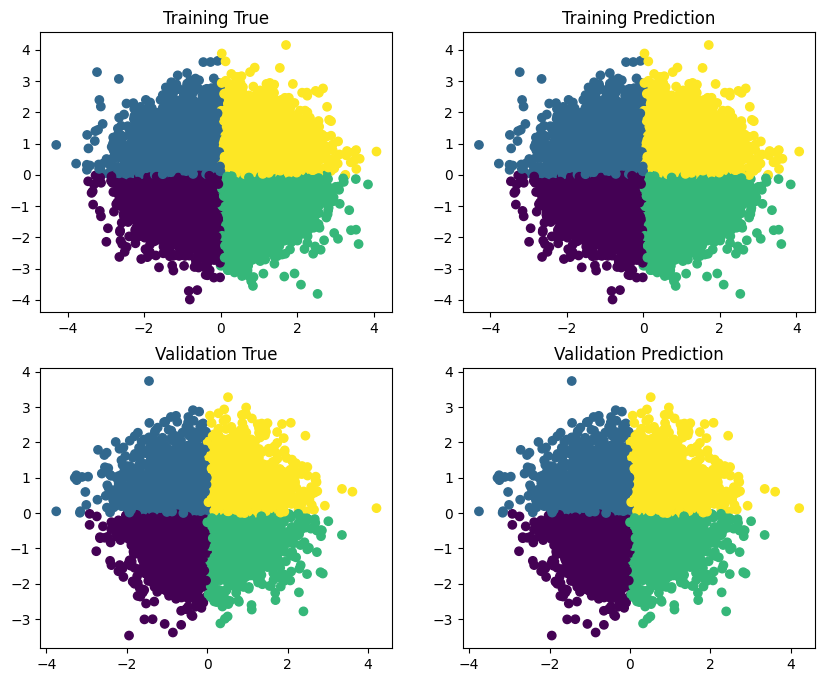

In [5]:
lr = 5e-3
batch_size = 16
dataset = sample_data

Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']

# define the network
network = GenericNetwork(SoftmaxLayer(2, 4))

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=5)

# plot the loss and accuracy
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)
plot_data(network, Xt, Yt, Xv, Yv)


### Task 2.2.1

In this task, we are asked to implement the forward and backward pass of the entire network.

We start by creating the [HiddenLayer](layers.py#L6) class, that will handle the logic of a single hidden layer in the network.
The key methods of this class are:
- [forward](layers.py#L25), computes $\sigma(Wx+b)$
- [JacxTMv](layers.py#L94) computes $J_x^T \mathbf{v}$. Used for the network's backpropagation
- [JacWTMv](layers.py#L110) computes $J_W^T \mathbf{v}$. Used for the network's backpropagation
- [JacbTMv](layers.py#L126) computes $J_b^T \mathbf{v}$. Used for the network's backpropagation

In order to continue, we first make sure that JacxTMv, JacWTMv, and JacbTMv work properly. To do this, we need the layer to pass the Transposed Jacobian test described in the notes.

The first step is to ensure the layer passes the regular Jacobian Test.
We implement the following methods for this purpose:

- [JacxMv](layers.py#L39) computes $J_x \mathbf{v}$
- [JacWMv](layers.py#L55) computes $J_W \mathbf{v}$
- [JacbMv](layers.py#L78) computes $J_b \mathbf{v}$ 

Now we create the [JacobianTest](utils.py#L219) function and test that our tanh layer passes the test.

Note 1: The method [JacΘMV](layers.py#L185) used in the JacobianTest computes the Jacobian with respect to all the parameters of the network, that is $x$, $W$, and $b$,
but it does so by calling the formerly mentioned functions, so we didn't give it special attention in the report.

Note 2: This section continues below the code 


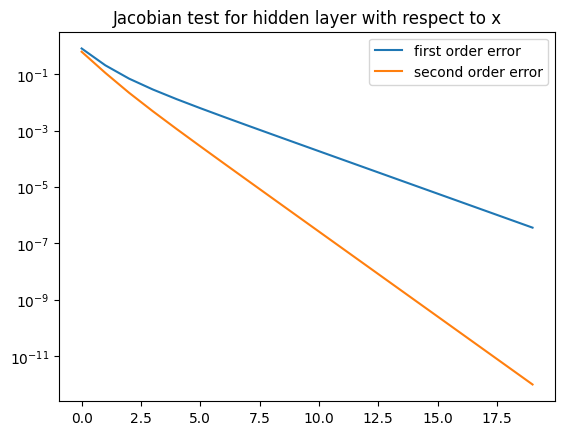

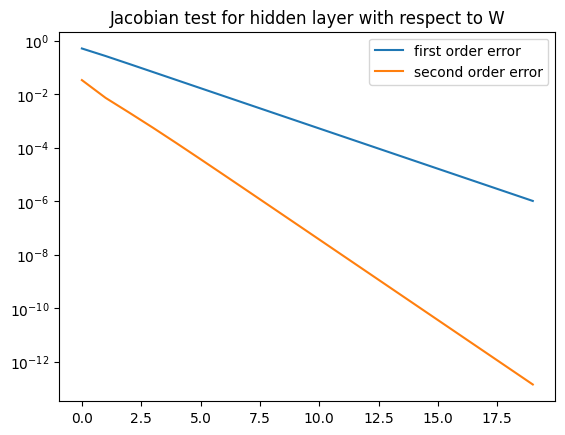

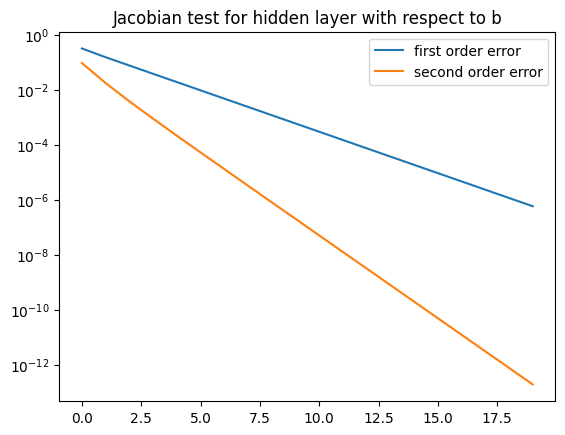

In [6]:
# in this part we do the jacobian test, the results of which are plotted below
tanh_layer = TanhLayer(2, 4)
hidden_layer_Jac_x_test(tanh_layer)
hidden_layer_Jac_W_test(tanh_layer)
hidden_layer_Jac_b_test(tanh_layer)

Now that our code passed the Jacobian Test, we are ready to run the [JacobianTransposeTest](utils.py#L271)

Note: this section continues below the code

In [7]:
# Now that we passed the Jacobian test, we will preform the Jacobian Transpose test
passed = hidden_layer_JacT_test(tanh_layer)
if passed:
    print('Jacobian Transpose Test Passed')
else:
    print('Jacobian Transpose Test Failed')

Jacobian Transpose Test Passed


After we saw that our hidden layer passes the jacobian transposed test, and that our loss layer passed the gradient test (in task 2.1.1), we are ready to start implementing the network itself.

We implement [GenericNetwork](neural_network.py#L10) that models the network itself,
in the model we implement the two methods:
- [forward](neural_network.py#L58) that implements the forward pass of the network
- [backpropagation](neural_network.py#L84) that implements the backpropagation

Below we do a gradient test on our implementation of the network, to make sure it works properly.
The test tests the Jaccobian of the network wit hrespect to the input and all the parameters of the hidden layers

The code of the tests themselves is available in the [tests.py](tests.py) file.

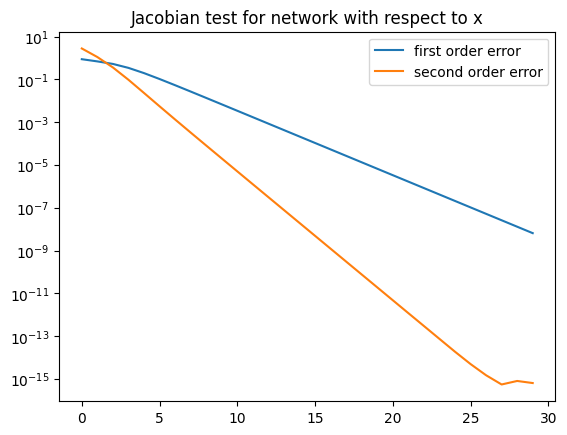

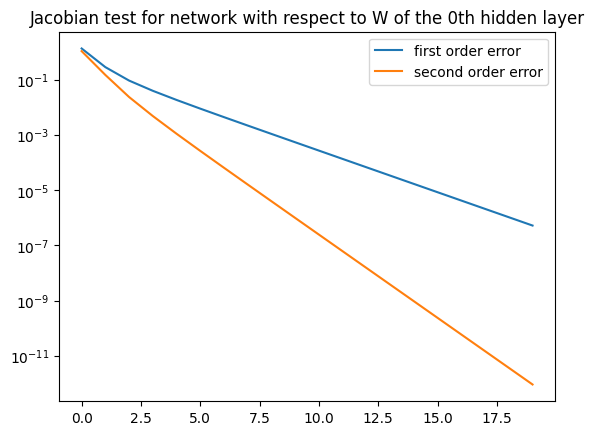

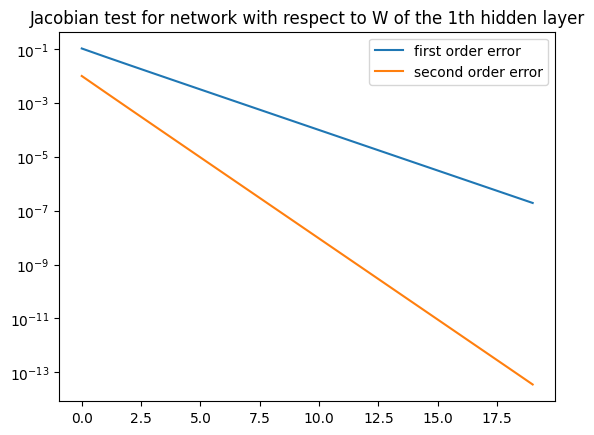

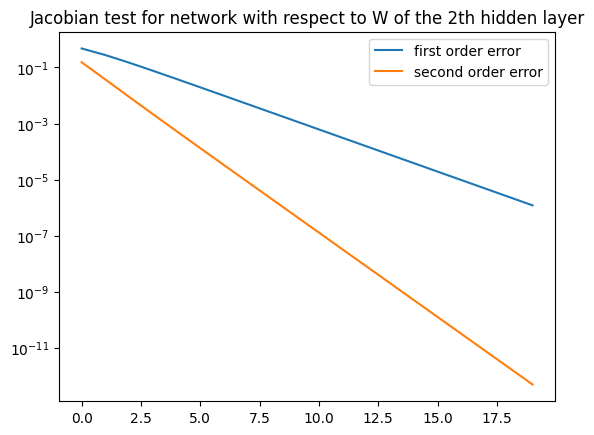

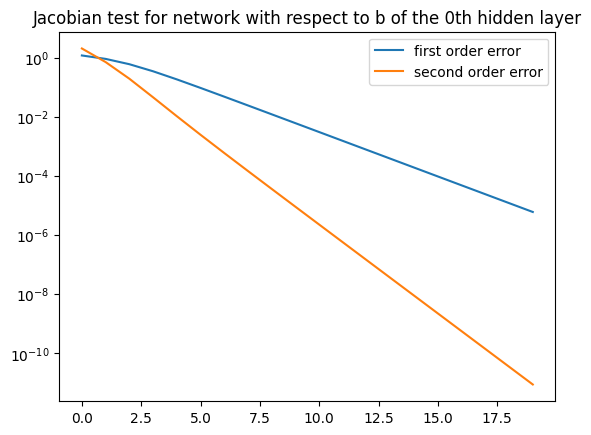

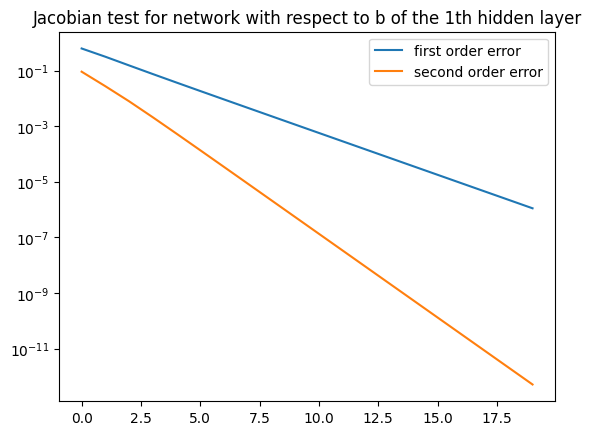

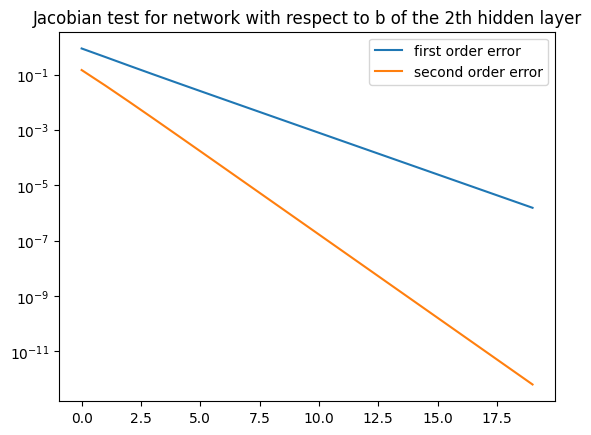

In [8]:
network = GenericNetwork( 
                            hidden_layers = [
                                TanhLayer(2, 3),
                                TanhLayer(3, 4),
                                TanhLayer(4, 5)
                            ],
                            output_layer=SoftmaxLayer(5, 4)
                        )

# Jacobian test with respect to the input
network_JacxMv_test(network)

# Jacobian test with respect to the weights of each layer
network_JacWiMv_test(network, i=0)
network_JacWiMv_test(network, i=1)
network_JacWiMv_test(network, i=2)

# Jacobian test with respect to the biases of each layer
network_JacbiMv_test(network, i=0)
network_JacbiMv_test(network, i=1)
network_JacbiMv_test(network, i=2)


### Task 2.2.2

In this task, we are asked to implement the forward and backward pass of the entire residual network.

We start by creating the [HiddenResidualLayer](layers.py#L247) class, that will handle the logic of a single hidden layer in the network.
The key methods of this class are:
- [forward](layers.py#L261), computes $ x + W_2 \sigma(W_1 x+b_1) + b_2 $
- [JacxTMv](layers.py#L277) computes $J_x^T \mathbf{v}$. Used for the network's backpropagation
- [JacW1TMv](layers.py#L292) computes $J_{W_1}^T \mathbf{v}$. Used for the network's backpropagation
- [JacW2TMv](layers.py#L315) computes $J_{W_2}^T \mathbf{v}$. Used for the network's backpropagation
- [Jacb1TMv](layers.py#L338) computes $J_{b_1}^T \mathbf{v}$. Used for the network's backpropagation
- [Jacb2TMv](layers.py#L353) computes $J_{b_2}^T \mathbf{v}$. Used for the network's backpropagation

In order to continue, we first make sure that JacxTMv, JacWTMv, and JacbTMv work properly. To do this, we need the layer to pass the Transposed Jacobian test described in the notes.

The first step is to ensure the layer passes the regular Jacobian Test.
We implement the following methods for this purpose:

- [JacxMv](layers.py#L367) computes $J_x \mathbf{v}$. Used for the network's backpropagation
- [JacW1Mv](layers.py#L382) computes $J_{W_1} \mathbf{v}$. Used for the network's backpropagation
- [JacW2Mv](layers.py#L412) computes $J_{W_2} \mathbf{v}$. Used for the network's backpropagation
- [Jacb1Mv](layers.py#L397) computes $J_{b_1} \mathbf{v}$. Used for the network's backpropagation
- [Jacb2Mv](layers.py#L427) computes $J_{b_2} \mathbf{v}$. Used for the network's backpropagation

We use [JacobianTest](utils.py#L219) function and test that our residual tanh layer passes the test.

Note: This section continues below the code


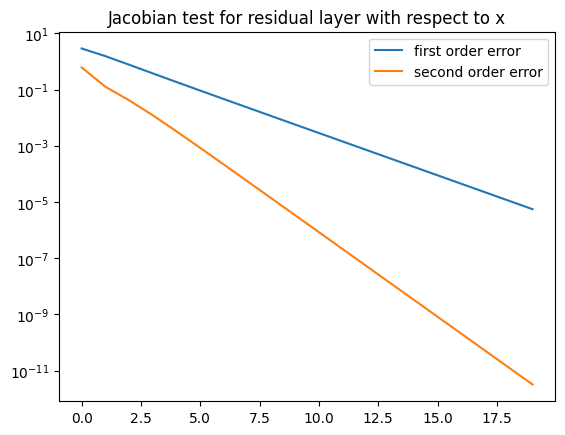

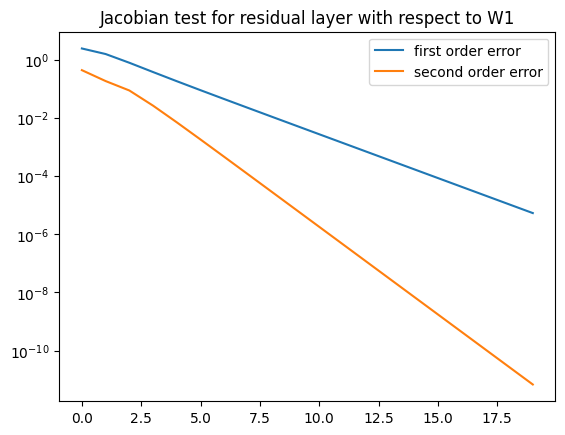

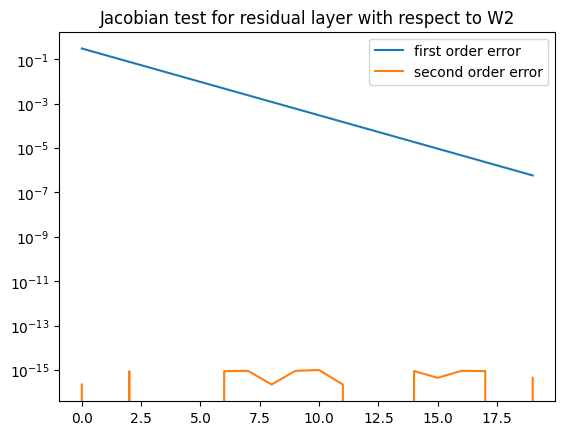

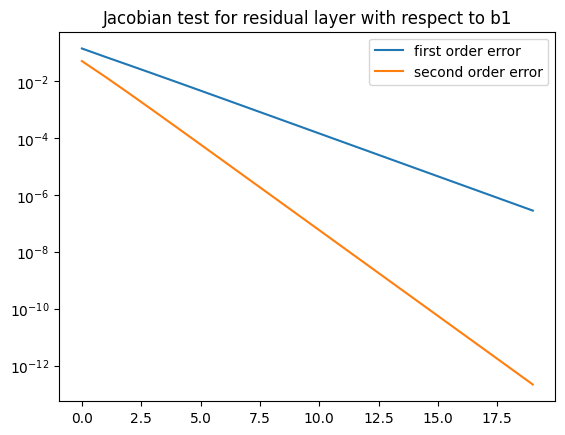

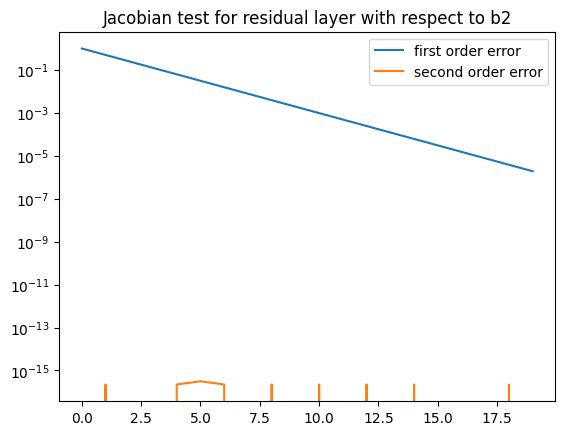

In [9]:
res_layer = ResidualTanhLayer(2, 4)

# Jacobian test with respect to the input
residual_layer_Jac_x_test(res_layer)

# Jacobian test with respect to the weights of the layer
residual_layer_Jac_W1_test(res_layer)
residual_layer_Jac_W2_test(res_layer)

# Jacobian test with respect to the biases of the layer
residual_layer_Jac_b1_test(res_layer)
residual_layer_Jac_b2_test(res_layer)

Now that our code passed the Jacobian Test, we are ready to run the [JacobianTransposeTest](utils.py#L271)

Note: this section continues below the code

In [10]:
# Now that we passed the Jacobian test, we will preform the Jacobian Transpose test
passed = residual_layer_JacT_test(res_layer)

if passed:
    print('Jacobian Transpose Test Passed')
else:
    print('Jacobian Transpose Test Failed')

Jacobian Transpose Test Passed


After we saw that our residual hidden layer passes the jacobian transposed test, and that our loss layer passed the gradient test (in task 2.1.1), we are ready to start implementing the network itself.

We implement [ResidualNeuralNetwork](neural_network.py#L264) that models the network itself,
in the model we implement the two methods:
- [forward](neural_network.py#L305) that implements the forward pass of the network
- [backpropagation](neural_network.py#L331) that implements the backpropagation

### Task 2.2.3
In this task, we are required to do a gradient test on the entire network, 
we first implement the gradient test functions, that ar eavailable in the [tests.py](tests.py) file.
each of them will test our network (regular or residual) on a random input and label, and will plot the results.
note that each test is run on a different set of parameters of the network.

We run the tests on both the regular network and the residual network, and the results are available below.

Simple Network Gradient Tests:


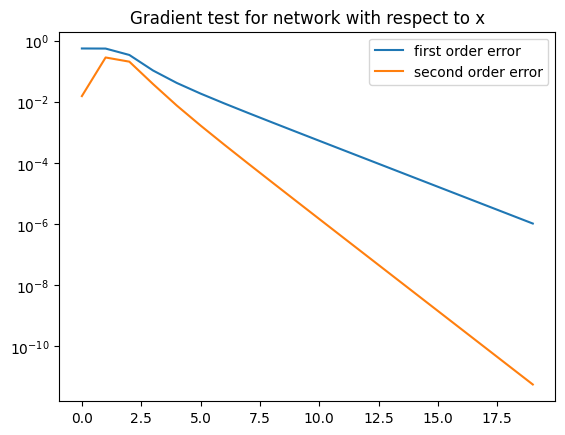

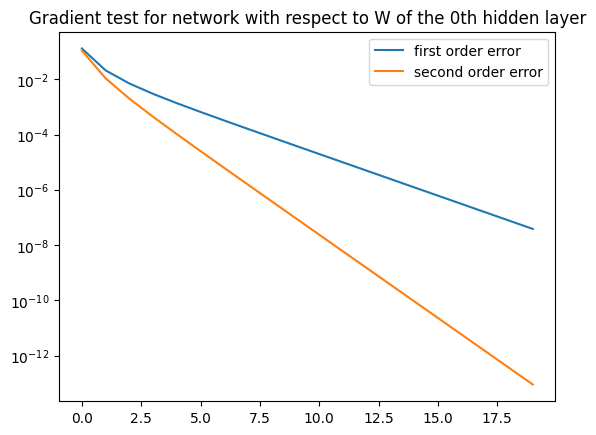

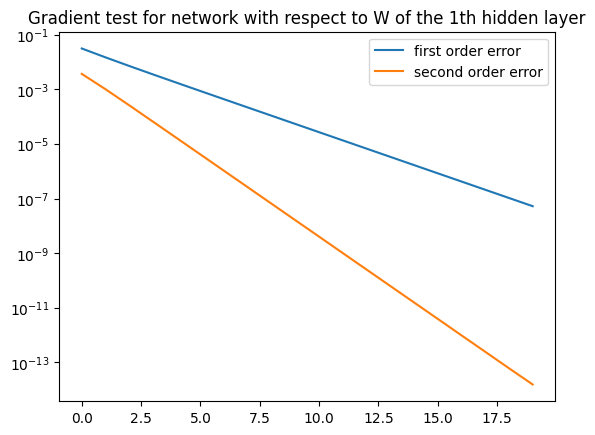

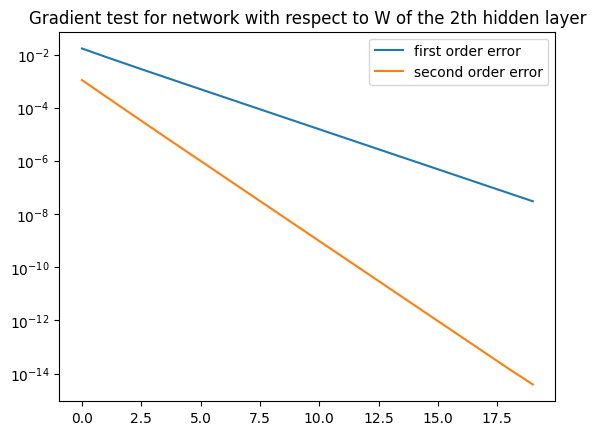

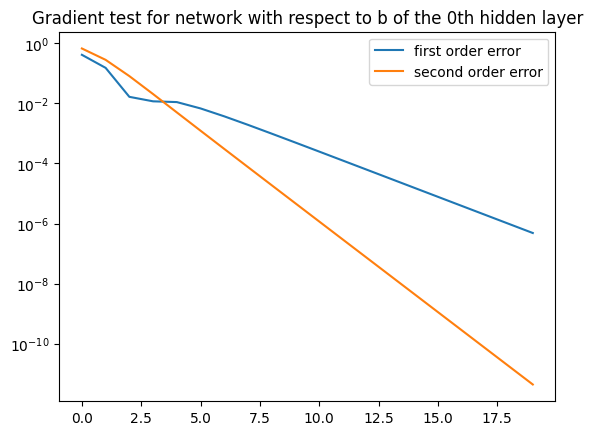

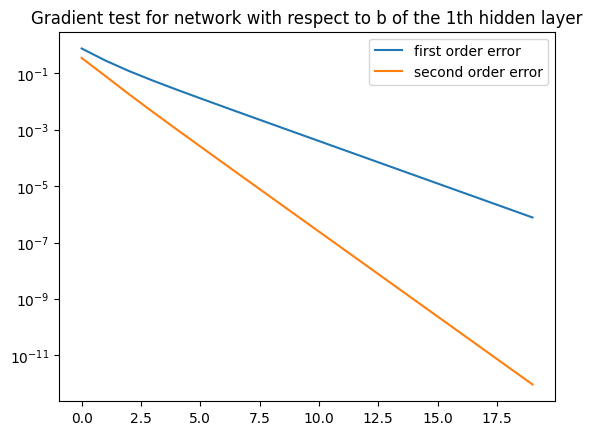

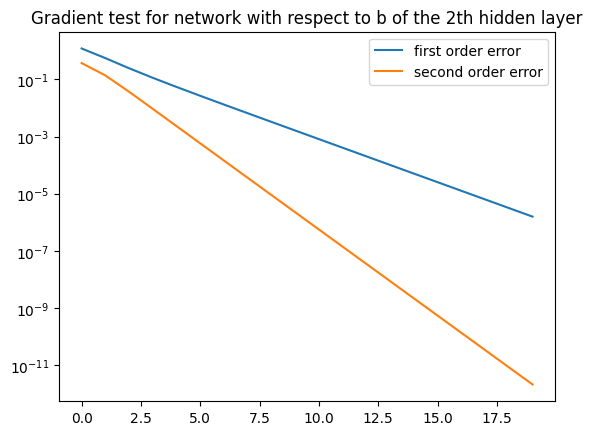

Residual Network Gradient Tests:


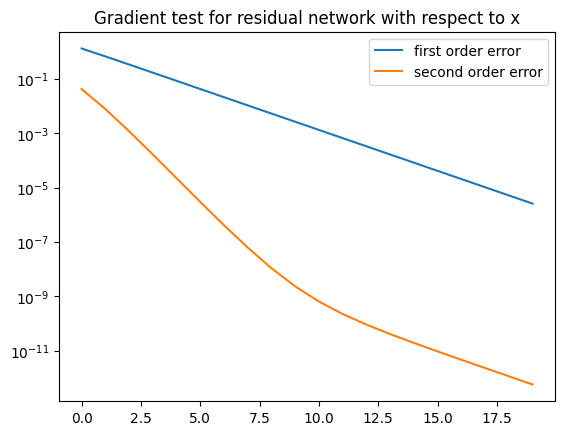

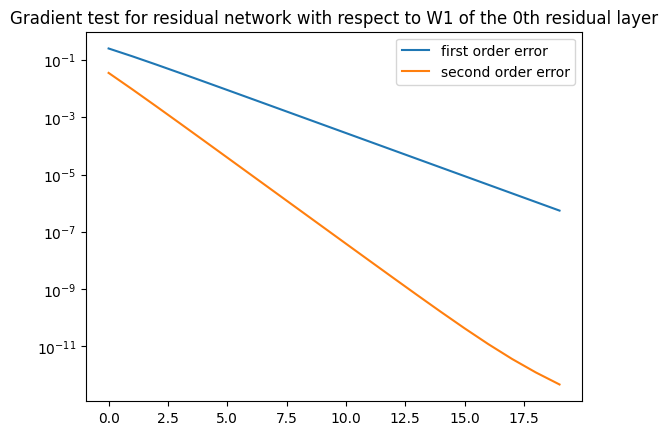

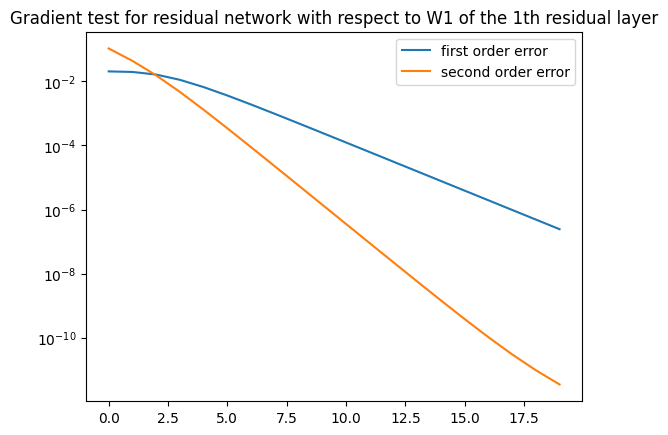

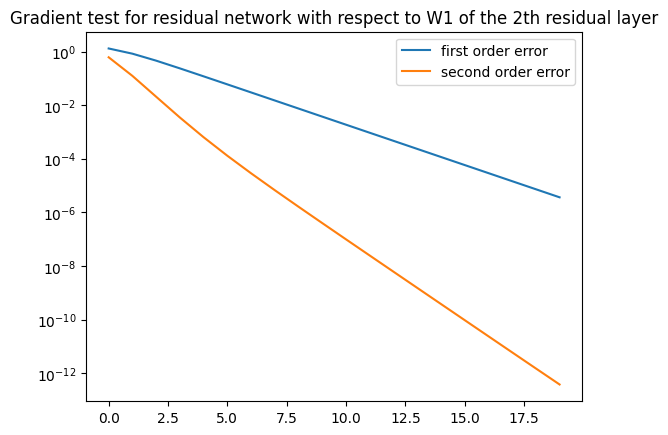

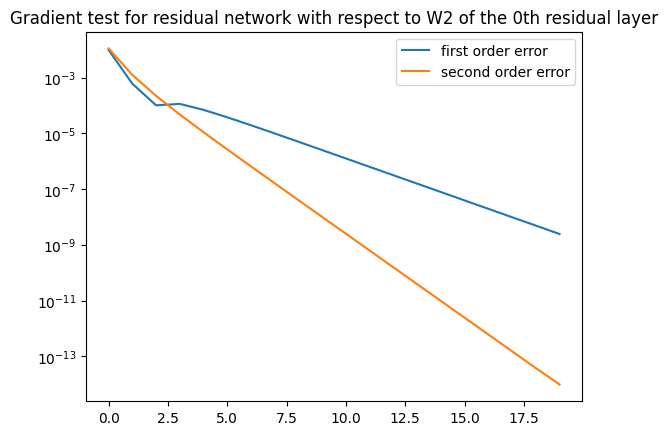

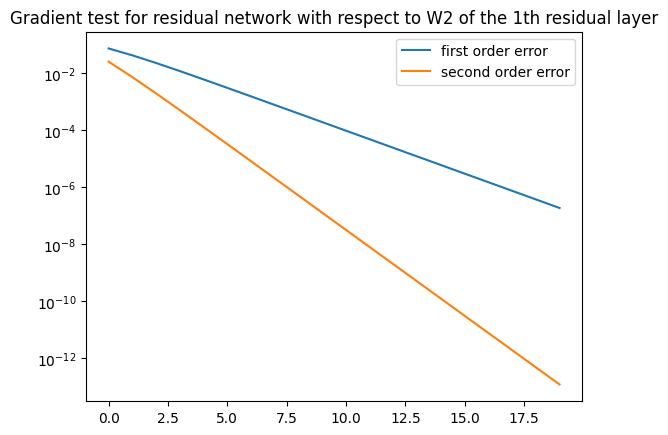

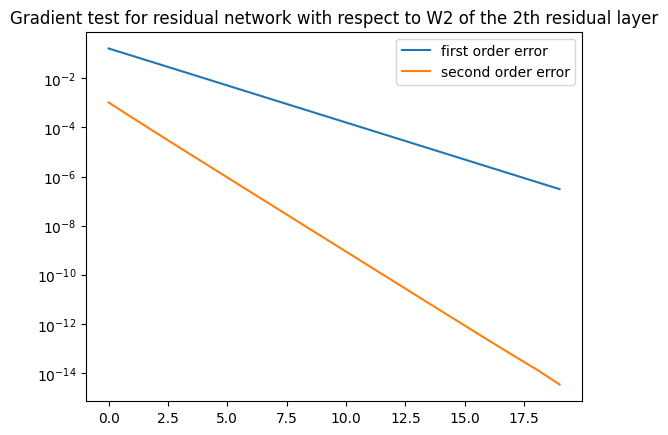

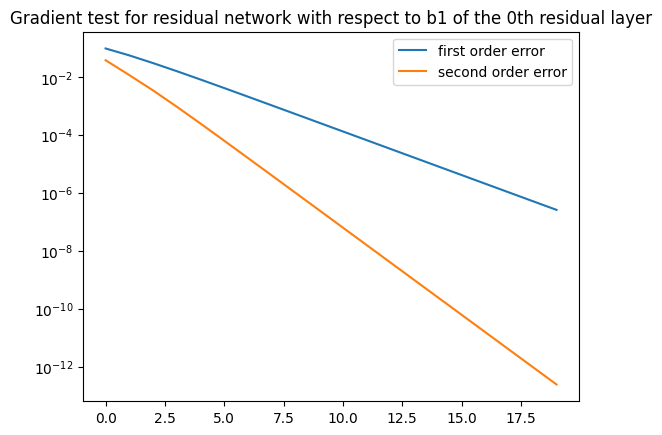

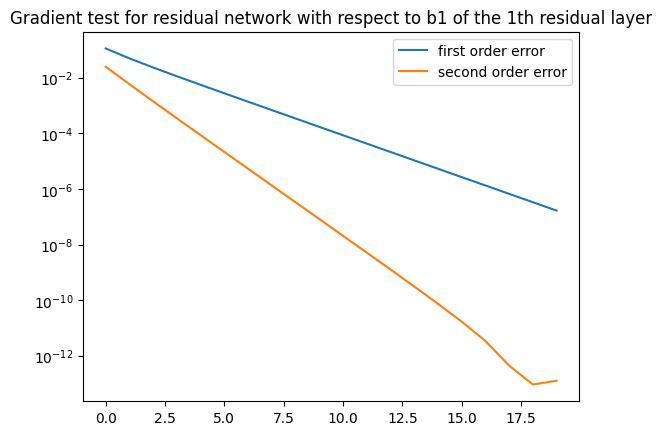

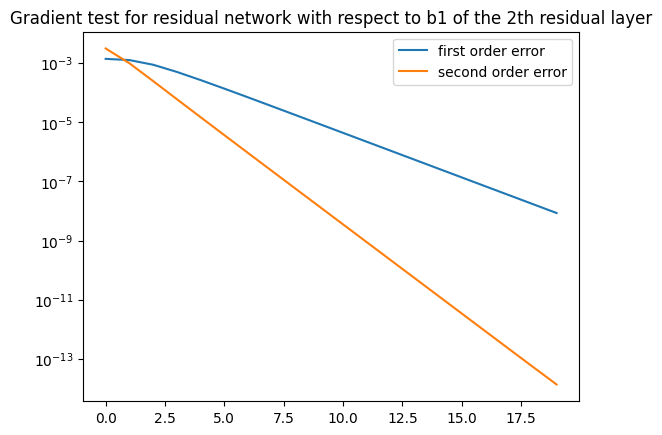

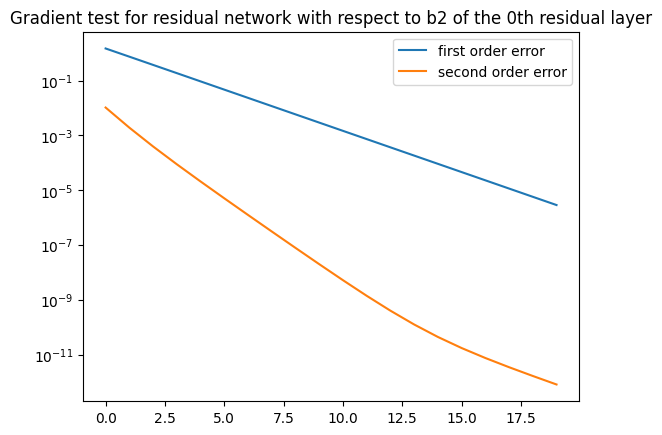

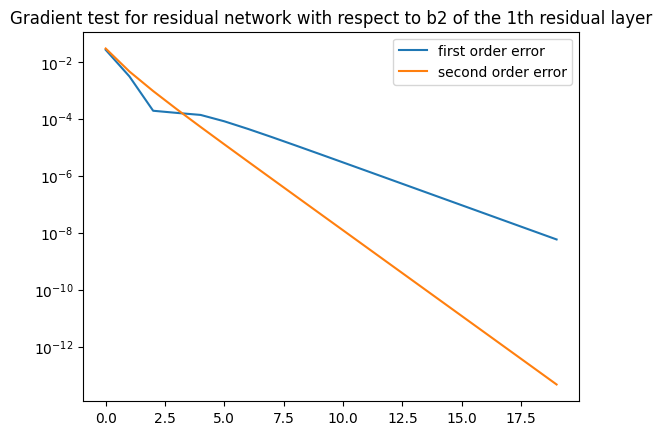

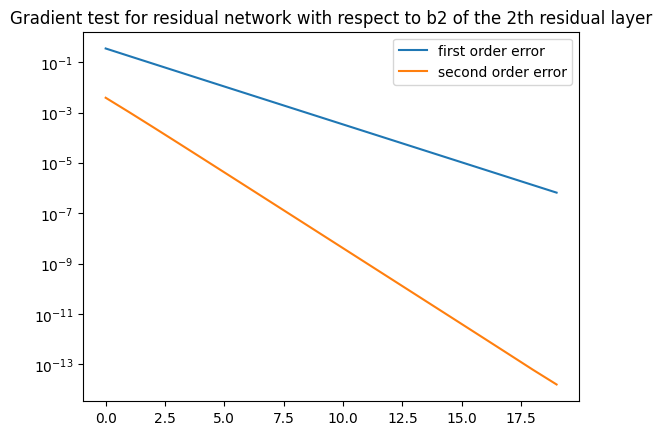

In [11]:
N = GenericNetwork(
                   hidden_layers=[
                            TanhLayer(2, 4), 
                            TanhLayer(4, 3),
                            TanhLayer(3, 2),
                        ],
                    output_layer= SoftmaxLayer(2, 2),
                )

print("Simple Network Gradient Tests:")

# Gradient test with respect to the input
network_grad_x_test(N)

# Gradient test with respect to the weights of each layer
network_grad_Wi_test(N, i=0)
network_grad_Wi_test(N, i=1)
network_grad_Wi_test(N, i=2)

# Gradient test with respect to the biases of each layer
network_grad_bi_test(N, i=0)
network_grad_bi_test(N, i=1)
network_grad_bi_test(N, i=2)


RN = ResidualNeuralNetwork(
                     layers=[
                             ResidualTanhLayer(2, 3), 
                             ResidualTanhLayer(2, 2),
                             ResidualTanhLayer(2, 2),
                            ],
                      output_layer= SoftmaxLayer(2, 4),
                 )

print("Residual Network Gradient Tests:")

# Gradient test with respect to the input
residual_network_grad_x_test(RN)

# Gradient test with respect to the W1 of each layer
residual_network_grad_W1i_test(RN, i=0)
residual_network_grad_W1i_test(RN, i=1)
residual_network_grad_W1i_test(RN, i=2)

# Gradient test with respect to the W2 of each layer
residual_network_grad_W2i_test(RN, i=0)
residual_network_grad_W2i_test(RN, i=1)
residual_network_grad_W2i_test(RN, i=2)

# Gradient test with respect to the b1 of each layer
residual_network_grad_b1i_test(RN, i=0)
residual_network_grad_b1i_test(RN, i=1)
residual_network_grad_b1i_test(RN, i=2)

# Gradient test with respect to the b2 of each layer
residual_network_grad_b2i_test(RN, i=0)
residual_network_grad_b2i_test(RN, i=1)
residual_network_grad_b2i_test(RN, i=2)


### Task 2.2.4

In this task,we train the network for each of the datasets, and we plot the results.
We try 3 different models, all configurations and hyperparameters are available in the [config](config) folder.

We try 3 different network lentgths:
- [2_layers](config/2_layers.json)
- [3_layers](config/3_layers.json)

Below we will show the results for each of the datasets


- Dataset: Swiss Roll
- Number of Data Points: 20000

| Metric / Layers       | 2 Layers            | 3 Layers            |
|-----------------------|---------------------|---------------------|
| Training Accuracy     | 0.96375             | 0.9547              |
| Validation Accuracy   | 0.9594              | 0.9512              |
| Training Loss         | 0.1781218044058837  | 0.32752549158550576 |
| Validation Loss       | 0.18960394361630745 | 0.3290716167628153  | 



As we can see, the netowrk that preformed the best is the 2 layers network.

We Plot the results of the best run below:


Epoch 0, training loss: 1.5417604574923836
Epoch 0, training accuracy: 0.5738
Epoch 0, validation loss: 1.4707191627501028
Epoch 0, validation accuracy: 0.5844
Epoch 1, training loss: 0.6600719917509805
Epoch 1, training accuracy: 0.6871
Epoch 1, validation loss: 0.6449979507523546
Epoch 1, validation accuracy: 0.6908
Epoch 2, training loss: 0.31917704463619856
Epoch 2, training accuracy: 0.87245
Epoch 2, validation loss: 0.31625025127162576
Epoch 2, validation accuracy: 0.8744
Epoch 3, training loss: 0.3081508713776179
Epoch 3, training accuracy: 0.8779
Epoch 3, validation loss: 0.3128167965370435
Epoch 3, validation accuracy: 0.8744
Epoch 4, training loss: 0.20923806044498677
Epoch 4, training accuracy: 0.9462
Epoch 4, validation loss: 0.20703200763808696
Epoch 4, validation accuracy: 0.9462
Epoch 5, training loss: 0.19707493502604906
Epoch 5, training accuracy: 0.95415
Epoch 5, validation loss: 0.20331614042369484
Epoch 5, validation accuracy: 0.9528
Epoch 6, training loss: 0.188491

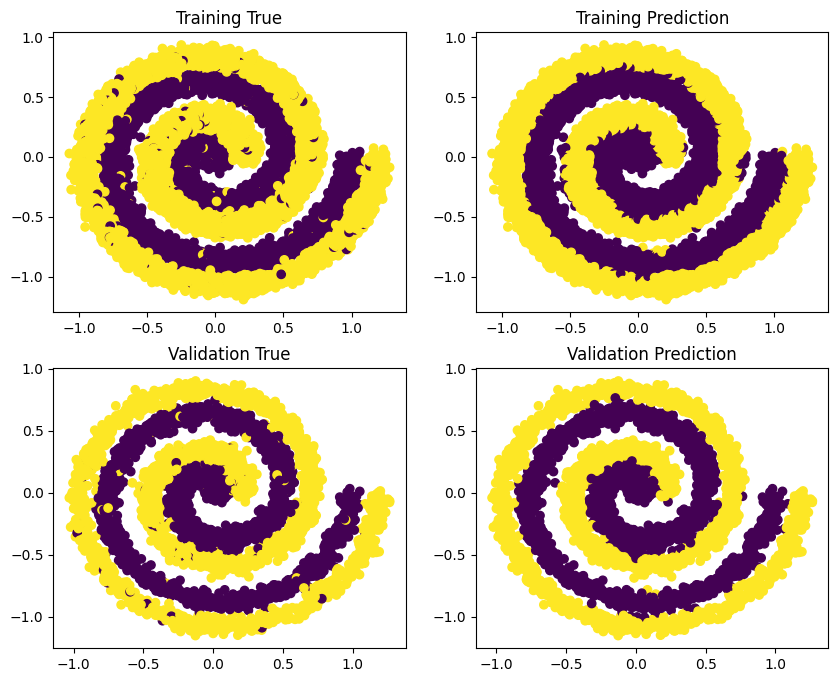

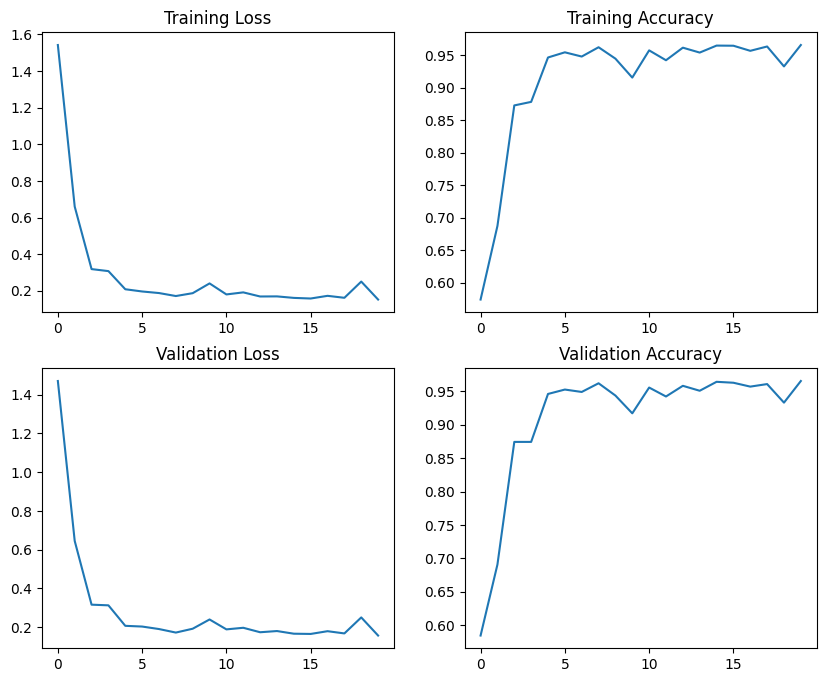

In [12]:
dataset = swiss_roll
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-3

network = GenericNetwork(
                        hidden_layers=[
                                ReLULayer(2, 32),
                                ReLULayer(32, 256),
                                ],
                        output_layer= SoftmaxLayer(256, 2),
                        )
# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=20, batch_size=16)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)


- Dataset: Peaks
- Number of Data Points: 20000

| Metric / Layers       | 2 Layers            | 3 Layers            |
|-----------------------|---------------------|---------------------|
| Training Accuracy     | 0.89332             | 0.87676             |
| Validation Accuracy   | 0.89808             | 0.872               |
| Training Loss         | 0.5122348502141716  | 0.44620290458756257 |
| Validation Loss       | 0.540490476298872   | 0.46816340180103966 | 



As we can see, the netowrk that preformed the best is the 2 layers network.

We Plot the results of the best run below:

Epoch 0, training loss: 1.400946551178041
Epoch 0, training accuracy: 0.84188
Epoch 0, validation loss: 1.400363514125595
Epoch 0, validation accuracy: 0.84016
Epoch 1, training loss: 0.571507050694043
Epoch 1, training accuracy: 0.87772
Epoch 1, validation loss: 0.5873360418369036
Epoch 1, validation accuracy: 0.8776
Epoch 2, training loss: 0.6319701664929503
Epoch 2, training accuracy: 0.81984
Epoch 2, validation loss: 0.6377423689586992
Epoch 2, validation accuracy: 0.8208
Epoch 3, training loss: 0.455377469227975
Epoch 3, training accuracy: 0.8746
Epoch 3, validation loss: 0.46515671097211425
Epoch 3, validation accuracy: 0.87136
Epoch 4, training loss: 0.4979060493161517
Epoch 4, training accuracy: 0.85212
Epoch 4, validation loss: 0.5099922385541311
Epoch 4, validation accuracy: 0.8504
Epoch 5, training loss: 0.5463815917418947
Epoch 5, training accuracy: 0.841
Epoch 5, validation loss: 0.5709846864228022
Epoch 5, validation accuracy: 0.83552
Epoch 6, training loss: 0.57885924787

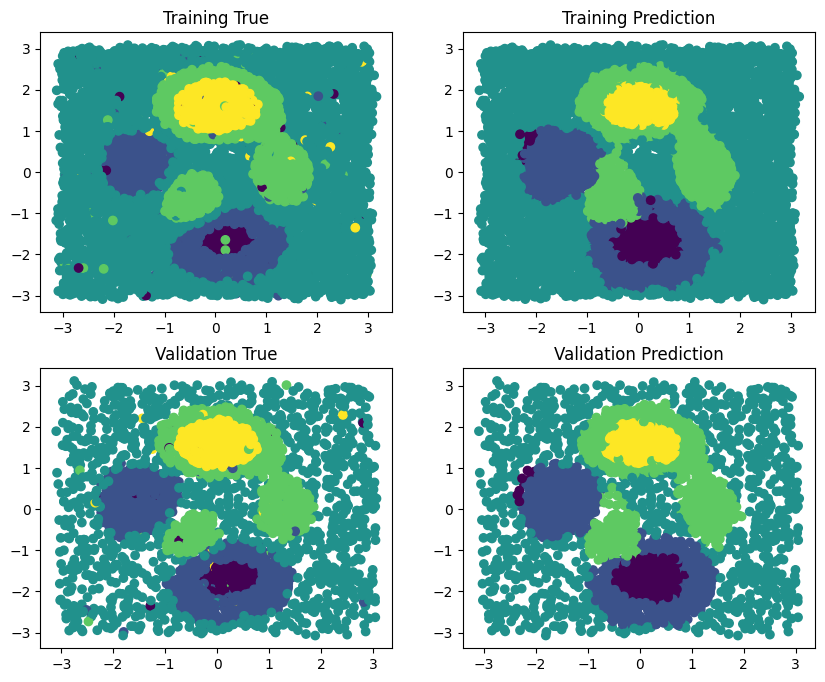

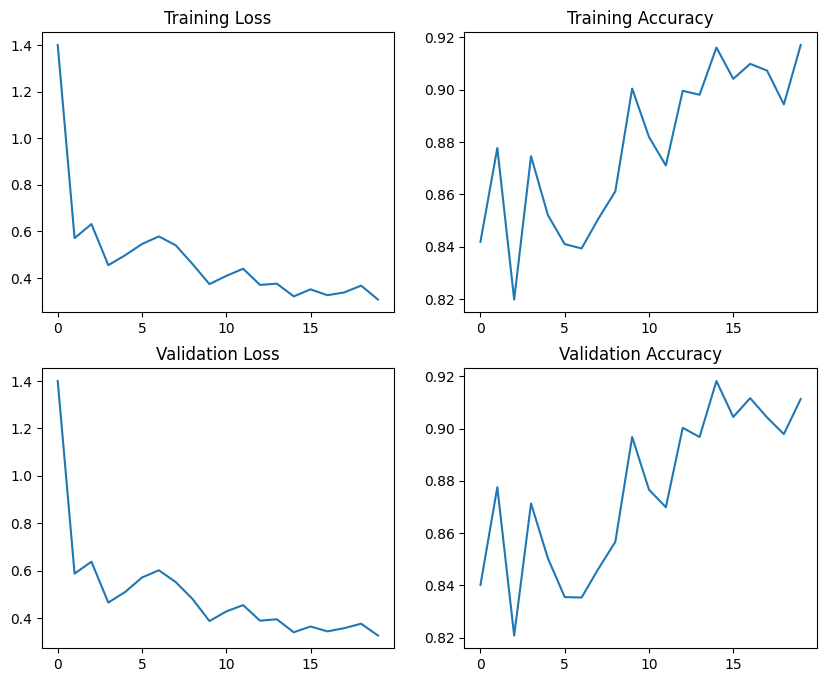

In [13]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-3

network = GenericNetwork(
                        hidden_layers=[
                                ReLULayer(2, 32),
                                ReLULayer(32, 256),
                                ],
                        output_layer= SoftmaxLayer(256, 5),
                        )
# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=20, batch_size=16)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

- Dataset: GMM
- Number of Data Points: 20000

| Metric / Layers       | 2 Layers            | 3 Layers            |
|-----------------------|---------------------|---------------------|
| Training Accuracy     | 0.9608              | 0.92508             |
| Validation Accuracy   | 0.95968             | 0.9272              |
| Training Loss         | 0.2608432425115813  | 0.3334058970901822  |
| Validation Loss       | 0.2738248861366154  | 0.3562195353418591  | 



As we can see, the netowrk that preformed the best is the 2 layers network.

We Plot the results of the best run below:

Epoch 0, training loss: 0.6573022014517304
Epoch 0, training accuracy: 0.93812
Epoch 0, validation loss: 0.6732392115153908
Epoch 0, validation accuracy: 0.94016
Epoch 1, training loss: 0.6234824705989689
Epoch 1, training accuracy: 0.93508
Epoch 1, validation loss: 0.6163151116647929
Epoch 1, validation accuracy: 0.93568
Epoch 2, training loss: 0.5757084194620152
Epoch 2, training accuracy: 0.9304
Epoch 2, validation loss: 0.6126428185932579
Epoch 2, validation accuracy: 0.92864
Epoch 3, training loss: 0.46746077762016314
Epoch 3, training accuracy: 0.94712
Epoch 3, validation loss: 0.5084858791677455
Epoch 3, validation accuracy: 0.94384
Epoch 4, training loss: 0.4183231497757832
Epoch 4, training accuracy: 0.95376
Epoch 4, validation loss: 0.4303253990026463
Epoch 4, validation accuracy: 0.95264
Epoch 5, training loss: 0.765461684996198
Epoch 5, training accuracy: 0.8774
Epoch 5, validation loss: 0.7804212805443033
Epoch 5, validation accuracy: 0.87376
Epoch 6, training loss: 0.3714

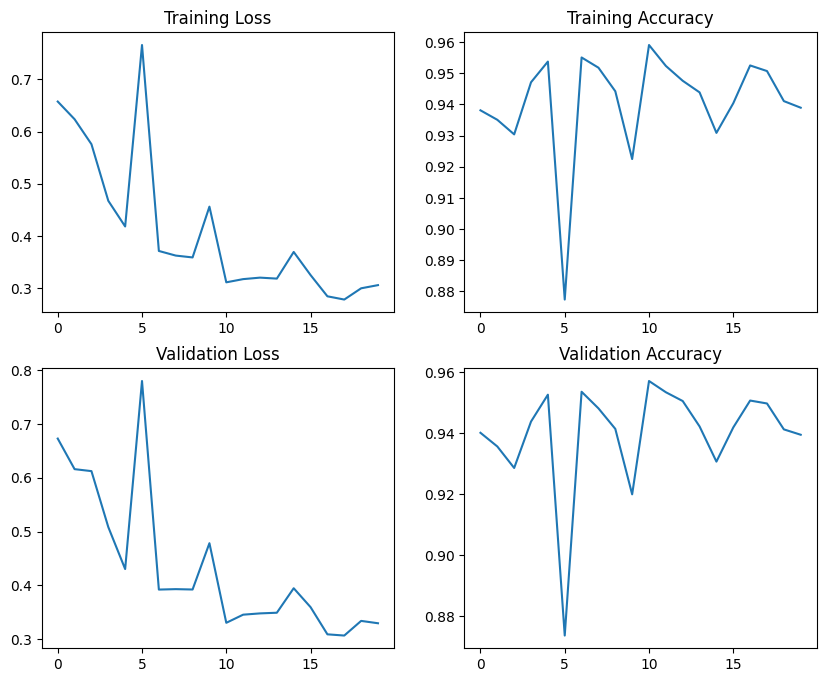

In [14]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-3

network = GenericNetwork(
                        hidden_layers=[
                                ReLULayer(5, 32),
                                ReLULayer(32, 256),
                                ],
                        output_layer= SoftmaxLayer(256, 5),
                        )
# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=20, batch_size=16)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

### Conclusion

Since the network with 3 layers did worse than the network with 2 layers on all datasets, we conclude that having more layers does not neccesarily mean better results.

### Task 2.2.5
In this part, we are asked to train again, only this time using only 200 data points.
We will use the same configurations as before. only this time we will run 1000 epochs instead of 20.

- Dataset: Swiss Roll
- Number of Data Points: 200

| Metric / Layers       | 2 Layers            | 3 Layers            |
|-----------------------|---------------------|---------------------|
| Training Accuracy     | 0.995               | 0.915               |
| Validation Accuracy   | 0.9368              | 0.8486              |
| Training Loss         | 0.04665149804121758 | 0.19722340986246784 |
| Validation Loss       | 0.22380165817759293 | 0.3982639149113306  | 



As we can see, the netowrk that preformed the best is the 2 layers network.

We Plot the results of the best run below:

Epoch 0, training loss: 4.192101877105135
Epoch 0, training accuracy: 0.61
Epoch 0, validation loss: 5.72966840422256
Epoch 0, validation accuracy: 0.5492
Epoch 1, training loss: 4.593117481671
Epoch 1, training accuracy: 0.685
Epoch 1, validation loss: 5.799793620744097
Epoch 1, validation accuracy: 0.6096
Epoch 2, training loss: 4.864221229147393
Epoch 2, training accuracy: 0.66
Epoch 2, validation loss: 6.039635706191404
Epoch 2, validation accuracy: 0.6068
Epoch 3, training loss: 3.7555713961519688
Epoch 3, training accuracy: 0.71
Epoch 3, validation loss: 4.753083056360875
Epoch 3, validation accuracy: 0.6478
Epoch 4, training loss: 2.7137567736697146
Epoch 4, training accuracy: 0.695
Epoch 4, validation loss: 4.060458541293645
Epoch 4, validation accuracy: 0.6132
Epoch 5, training loss: 2.56565142253096
Epoch 5, training accuracy: 0.675
Epoch 5, validation loss: 3.8352077599905265
Epoch 5, validation accuracy: 0.5844
Epoch 6, training loss: 3.909468743146749
Epoch 6, training acc

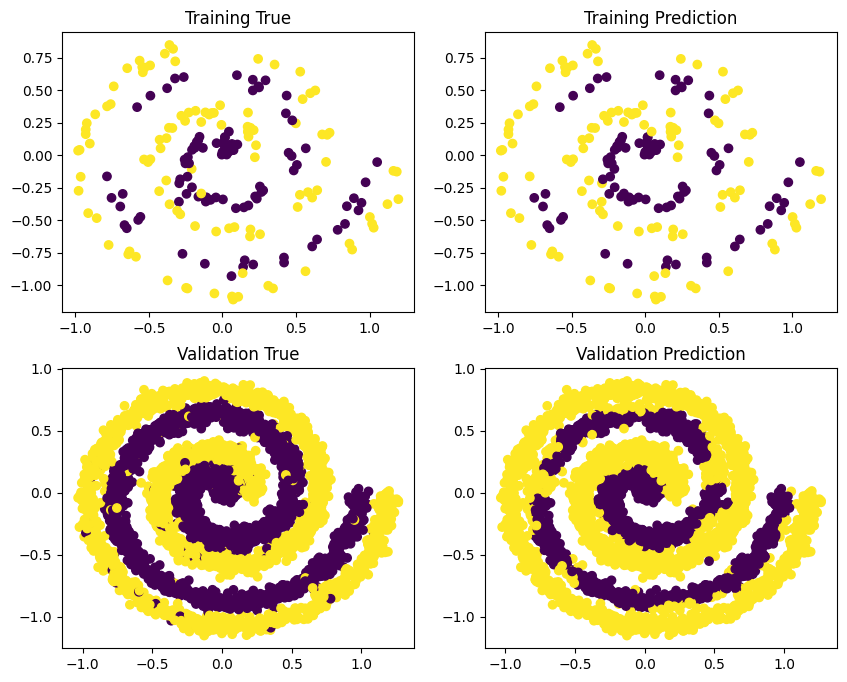

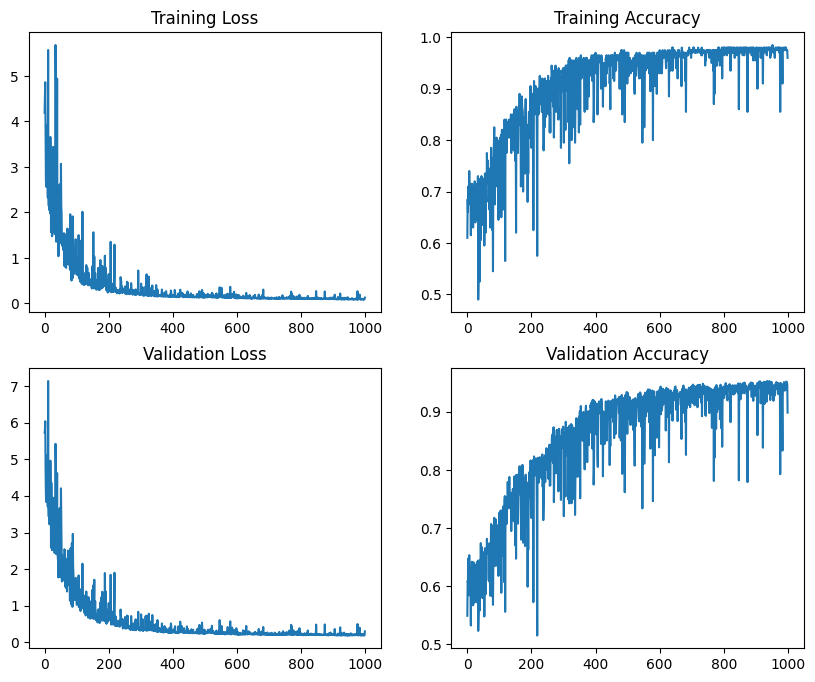

In [15]:
dataset = swiss_roll
Xt = dataset['Yt']
Yt = dataset['Ct']

# randomly select 200 columns
random_columns = np.random.choice(Xt.shape[1], 200, replace=False)
Xt = Xt[:, random_columns]
Yt = Yt[:, random_columns]

Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-3

network = GenericNetwork(
                        hidden_layers = [
                            ReLULayer(2, 32),
                            ReLULayer(32, 256),
                        ],
                        output_layer= SoftmaxLayer(256, 2)
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=1000, batch_size=16)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

- Dataset: Peaks
- Number of Data Points: 200

| Metric / Layers       | 2 Layers            | 3 Layers            |
|-----------------------|---------------------|---------------------|
| Training Accuracy     | 0.945               | 0.995               |
| Validation Accuracy   | 0.83216             | 0.79344             |
| Training Loss         | 1.5999391528893958  | 0.0432146041103893  |
| Validation Loss       | 0.22380165817759293 | 1.484514240184251   | 

As we can see, the netowrk that preformed the best is the 2 layers network.

We Plot the results of the best run below:

Epoch 0, training loss: 13.088567057148616
Epoch 0, training accuracy: 0.41
Epoch 0, validation loss: 12.508007212513892
Epoch 0, validation accuracy: 0.416
Epoch 1, training loss: 9.98921314608506
Epoch 1, training accuracy: 0.53
Epoch 1, validation loss: 9.371780008017241
Epoch 1, validation accuracy: 0.5696
Epoch 2, training loss: 5.977506465729871
Epoch 2, training accuracy: 0.68
Epoch 2, validation loss: 7.383671963997646
Epoch 2, validation accuracy: 0.64176
Epoch 3, training loss: 4.597423703896265
Epoch 3, training accuracy: 0.67
Epoch 3, validation loss: 5.5180043790166975
Epoch 3, validation accuracy: 0.67888
Epoch 4, training loss: 5.827776333930294
Epoch 4, training accuracy: 0.67
Epoch 4, validation loss: 6.756646937555858
Epoch 4, validation accuracy: 0.61568
Epoch 5, training loss: 4.861869649955883
Epoch 5, training accuracy: 0.685
Epoch 5, validation loss: 7.062506313038708
Epoch 5, validation accuracy: 0.58656
Epoch 6, training loss: 5.0666460947299985
Epoch 6, traini

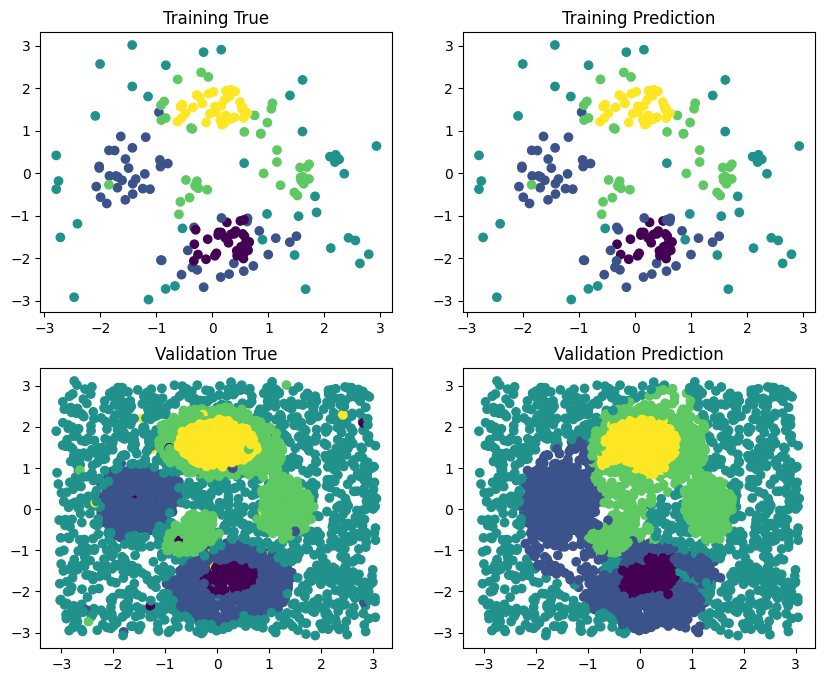

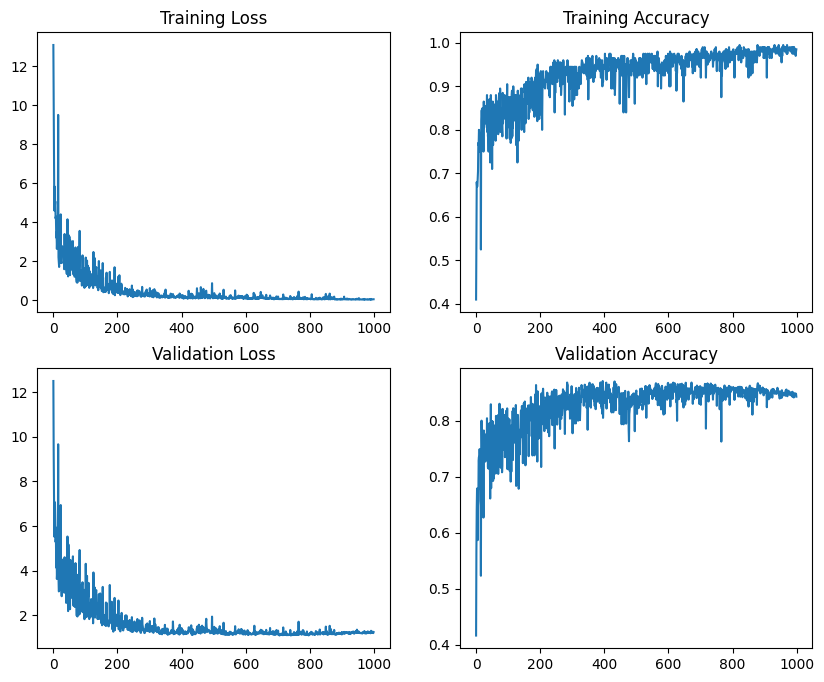

In [16]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']

# randomly select 200 columns
random_columns = np.random.choice(Xt.shape[1], 200, replace=False)
Xt = Xt[:, random_columns]
Yt = Yt[:, random_columns]

Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-3

network = GenericNetwork(
                        hidden_layers = [
                            ReLULayer(2, 32),
                            ReLULayer(32, 256),
                        ],
                        output_layer= SoftmaxLayer(256, 5)
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=1000, batch_size=16)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

- Dataset: Peaks
- Number of Data Points: 200

| Metric / Layers       | 2 Layers            | 3 Layers            |
|-----------------------|---------------------|---------------------|
| Training Accuracy     | 1.0                 | 1.0                 |
| Validation Accuracy   | 0.85872             | 0.81776             |
| Training Loss         | 0.000204139399162   | 0.013321762278303782|
| Validation Loss       | 1.7378248903440212  | 1.3019116779486766  | 


As we can see, the netowrk that preformed the best is the 2 layers network.

We Plot the results of the best run below:

Epoch 0, training loss: 14.85995029937791
Epoch 0, training accuracy: 0.345
Epoch 0, validation loss: 14.180093153081602
Epoch 0, validation accuracy: 0.3744
Epoch 1, training loss: 4.675715221084159
Epoch 1, training accuracy: 0.675
Epoch 1, validation loss: 5.611446147313245
Epoch 1, validation accuracy: 0.64784
Epoch 2, training loss: 8.392335003739912
Epoch 2, training accuracy: 0.52


Epoch 2, validation loss: 8.510636397930874
Epoch 2, validation accuracy: 0.532
Epoch 3, training loss: 3.2400777714706224
Epoch 3, training accuracy: 0.74
Epoch 3, validation loss: 4.132543099770539
Epoch 3, validation accuracy: 0.74128
Epoch 4, training loss: 2.709115554260862
Epoch 4, training accuracy: 0.825
Epoch 4, validation loss: 3.589725515183409
Epoch 4, validation accuracy: 0.77904
Epoch 5, training loss: 2.490359424714393
Epoch 5, training accuracy: 0.85
Epoch 5, validation loss: 3.3490421151026
Epoch 5, validation accuracy: 0.7904
Epoch 6, training loss: 5.825522299182728
Epoch 6, training accuracy: 0.655
Epoch 6, validation loss: 6.15254384178834
Epoch 6, validation accuracy: 0.6504
Epoch 7, training loss: 2.5399176646585437
Epoch 7, training accuracy: 0.805
Epoch 7, validation loss: 3.414283543396839
Epoch 7, validation accuracy: 0.76768
Epoch 8, training loss: 2.3584263489133703
Epoch 8, training accuracy: 0.82
Epoch 8, validation loss: 2.7512154456964915
Epoch 8, valid

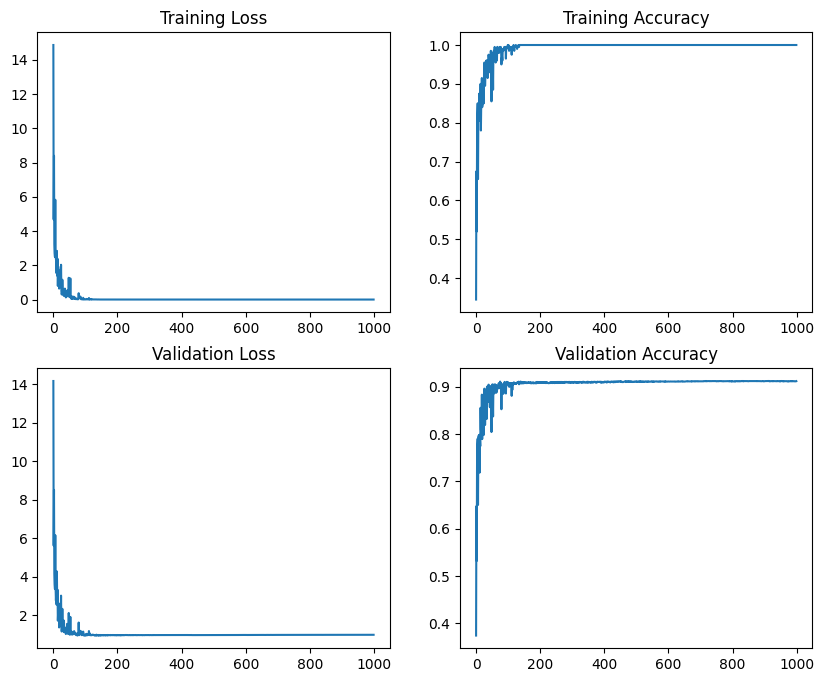

In [17]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']

# randomly select 200 columns
random_columns = np.random.choice(Xt.shape[1], 200, replace=False)
Xt = Xt[:, random_columns]
Yt = Yt[:, random_columns]

Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-3

network = GenericNetwork(
                        hidden_layers = [
                            ReLULayer(5, 32),
                            ReLULayer(32, 256),
                        ],
                        output_layer= SoftmaxLayer(256, 5)
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=1000, batch_size=16)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

### Conclusion

We saw that the network with the amount of data didn't matter much, both networks got about 80% accuracy on the validation set,
using only 200 data points, on all sets
This is only about 10% less than the accuracy we got when using 20000 data points.